# Упражнения с фильтрами

## Установка пакета

Для работы с изображениями удобно использовать библиотеку OpenCV. Она доступна как на Python, так и на C++. 
Установка opencv-python в pip выполняется командой `pip install opencv-python`.

In [1]:
!pip install opencv-python

# Импорт библиотек

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Загрузка изображения

In [3]:
# image = cv2.imread('test_image.png',cv2.IMREAD_GRAYSCALE)
image = cv2.imread('test_image.png',cv2.IMREAD_COLOR)

# Вывод изображения

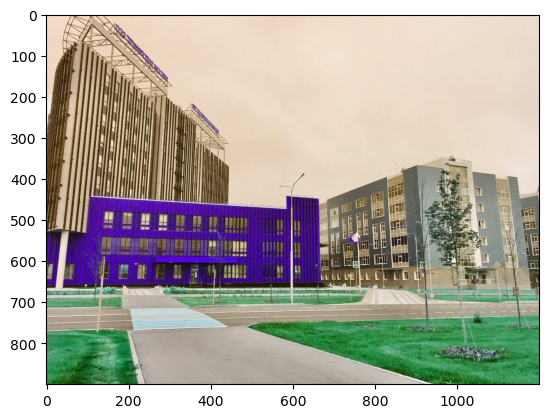

In [4]:
plt.imshow(image)

Matplotlib отображает картинку в формате RGB, OpenCV хранит картинку в формате BGR. Исправим это.

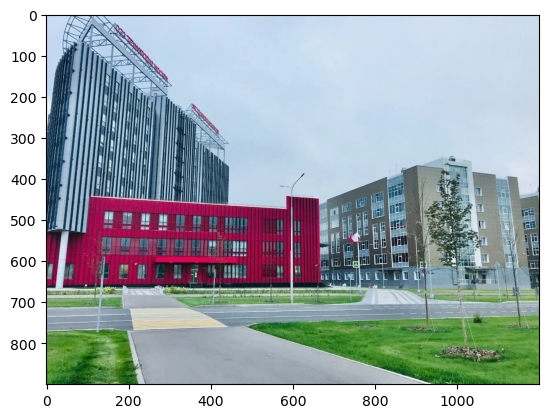

In [5]:
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# RGB_image = image[:,:,::-1]

plt.imshow(RGB_image)

# Выполним конвертацию изображения в оттенки серого

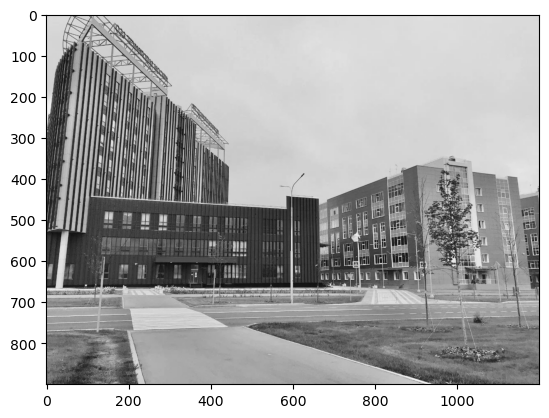

In [6]:
GR_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_to_show = cv2.cvtColor(GR_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)

# Попробуем сами реализовать функцию конвертации rgb to grayscale

In [7]:
def to_gray_naive(img: np.ndarray, format: str):
    if format.lower() == 'bgr':
        b, g, r = img[..., 0], img[..., 1], img[..., 2]
        return ((r + g + b)/3).astype('uint8')
    elif format.lower() == 'rgb':
        r, g, b = img[..., 0], img[..., 1], img[..., 2]
        return ((r + g + b)/3).astype('uint8')
    else:
        raise Exception('Unsupported value in parameter \'format\'')

In [8]:
def to_gray(img: np.ndarray, format: str):
    '''
    Algorithm:
    >>> 0.2989 * R + 0.5870 * G + 0.1140 * B 
    - Returns a gray image
    '''

    r_coef = 0.2989
    g_coef = 0.5870
    b_coef = 0.1140

    if format.lower() == 'bgr':
        b, g, r = img[..., 0], img[..., 1], img[..., 2]
        return (r_coef * r + g_coef * g + b_coef * b).astype('uint8')
    elif format.lower() == 'rgb':
        r, g, b = img[..., 0], img[..., 1], img[..., 2]
        return (r_coef * r + g_coef * g + b_coef * b).astype('uint8')
    else:
        raise Exception('Unsupported value in parameter \'format\'')

In [9]:
type(image)

numpy.ndarray

In [10]:
image.shape

(900, 1200, 3)

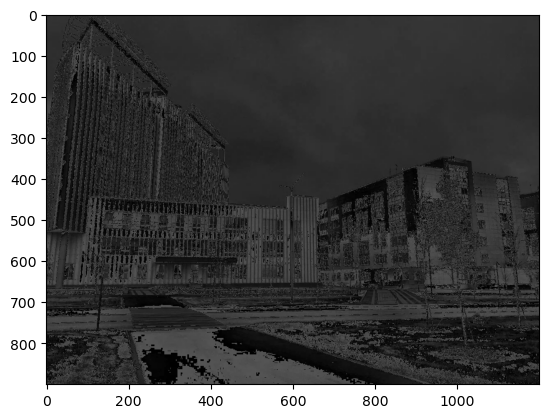

In [11]:
GR_image_custom = to_gray_naive(image, 'bgr')

image_to_show = cv2.cvtColor(GR_image_custom, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)

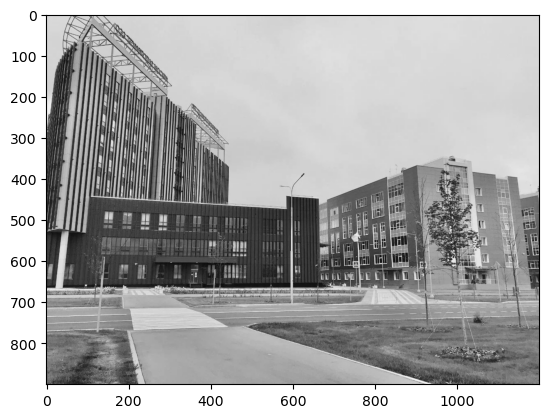

In [12]:
GR_image_custom = to_gray(image, 'bgr')

image_to_show = cv2.cvtColor(GR_image_custom, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)

In [13]:
GR_image_custom = GR_image_custom.astype('uint8')
GR_image_custom

array([[217, 217, 217, ..., 217, 217, 217],
       [217, 217, 217, ..., 217, 217, 217],
       [217, 217, 217, ..., 217, 217, 217],
       ...,
       [130, 106, 100, ..., 120, 123, 132],
       [122,  99,  95, ..., 124, 121, 134],
       [102,  94,  97, ..., 136, 124, 129]], dtype=uint8)

# Зададим фильтры и выполним свертку

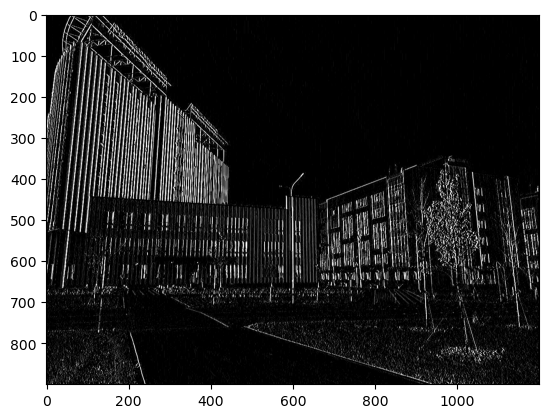

In [14]:
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
filtered_image_vert = cv2.filter2D(GR_image_custom, -1, kernel)

image_to_show = cv2.cvtColor(filtered_image_vert, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)

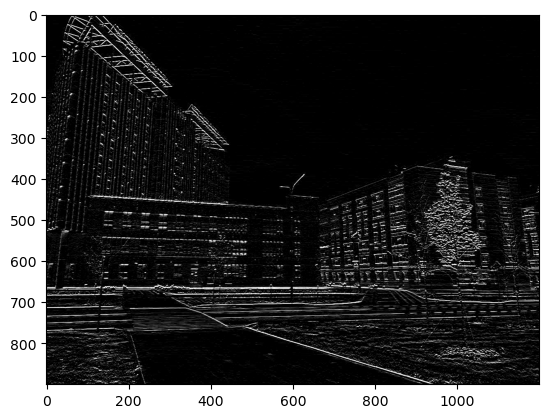

In [15]:
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
filtered_image_hor = cv2.filter2D(GR_image_custom, -1, kernel)

image_to_show = cv2.cvtColor(filtered_image_hor, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)

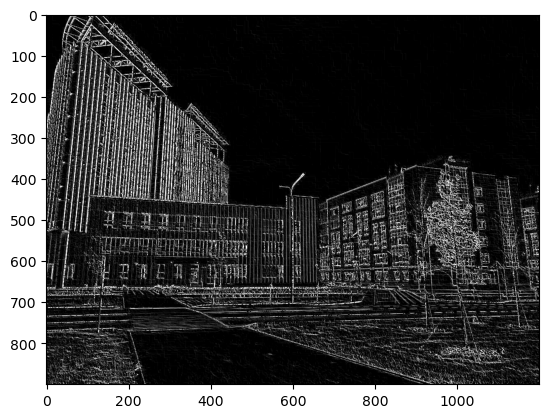

In [16]:
filtered_image_sum = (filtered_image_vert+filtered_image_hor)

image_to_show = cv2.cvtColor(filtered_image_sum, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)

# Поиск части изображения

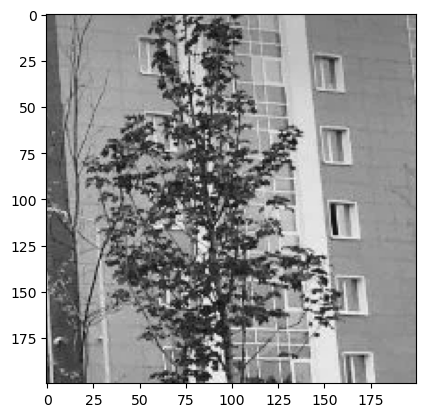

In [17]:
part = GR_image_custom[400:600,900:1100]

image_to_show = cv2.cvtColor(part, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)

In [18]:
kernel = part.astype(float)-255/2
GR_image_float = GR_image_custom.astype(float)-255/2

filtered_image_tree = cv2.filter2D(GR_image_float, -1, kernel)

In [19]:
center = np.unravel_index(np.argmax(filtered_image_tree, axis=None), filtered_image_tree.shape) 
center

(500, 1000)

(900, 400) (1100, 600)


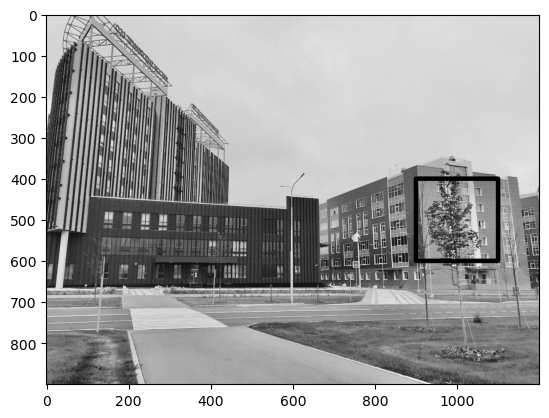

In [20]:
kernel_w = kernel.shape[0]
kernel_h = kernel.shape[1]

x1 = (center[1] - kernel_w/2).astype(int)
y1 = (center[0] - kernel_h/2).astype(int)

x2 = (center[1] + kernel_w/2).astype(int)
y2 = (center[0] + kernel_h/2).astype(int)

print((x1,y1), (x2,y2))

image_with_rectangle = cv2.rectangle(GR_image, (x1,y1), (x2,y2), (0, 0, 0), 10) 

image_to_show = cv2.cvtColor(image_with_rectangle, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_show)